In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## separation entre le train et test set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print('train set ',X_train.shape)
print('test set ',X_test.shape)

train set  (120, 4)
test set  (30, 4)


Text(0.5, 1.0, 'Test set')

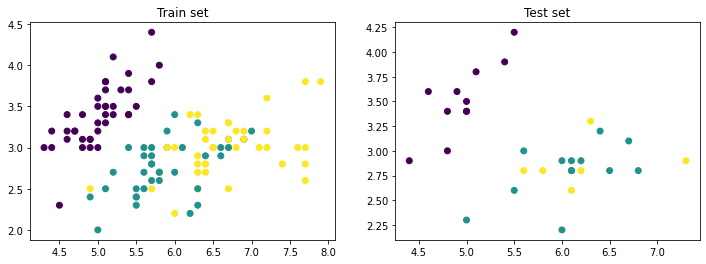

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.title('Train set')
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.title('Test set')

In [6]:
from sklearn.neighbors import KNeighborsClassifier

C'est une mauvaise façon de faire on test dans la base des test

In [7]:
model = KNeighborsClassifier(n_neighbors=4)# 3,5,6
model.fit(X_train,y_train)
print("Train set :",model.score(X_train,y_train))
print("Test set :",model.score(X_test,y_test))

Train set : 0.95
Test set : 1.0


# Problème: est-ce une bonne idée d'optimiser dans les données du test set?

Non, si on règle dans les données du test set, il connaitra indirectement ces données, pluqu'il est reglé dessus.

*Réponse*: on utilise donc une base de validation

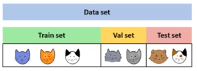

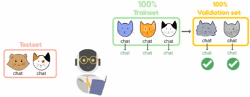

Guide: 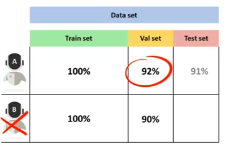

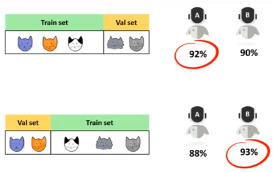
# Problème: Mais comment savoir que nous avons fait le bon decoupage?

## La cross Validation

Nous allons utiliser la technique StratifiedFold
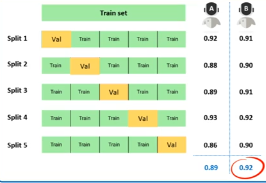

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5,
                scoring='accuracy' )

array([0.95833333, 0.875     , 0.95833333, 1.        , 0.875     ])

In [10]:
cross_val_score(KNeighborsClassifier(),
                X_train,y_train,cv=5,scoring='accuracy' ).mean()

0.9333333333333333

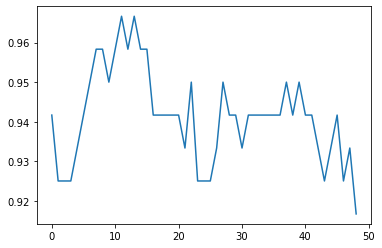

In [11]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k),X_train,y_train,
                            cv=5,scoring='accuracy' ).mean()
    val_score.append(score)
plt.plot(val_score)

Ici on voit que c'est autour de 10 que les performances de l'entrainnement est optimal.

**Ce graphe peut être tracer avec une fonction**

# Validation curve

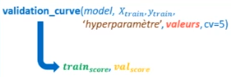

In [12]:
from sklearn.model_selection import validation_curve

In [13]:
model = KNeighborsClassifier()
k = np.arange(1,50)
train_score,val_score = validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5)

C:\Users\ZEUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


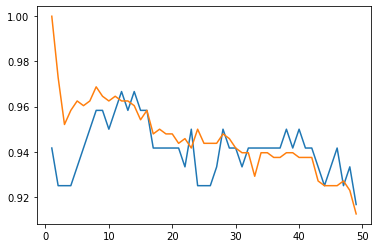

In [14]:
plt.plot(k,val_score.mean(axis=1))
plt.plot(k,train_score.mean(axis=1))

Cette technique est importante car il permet de voir les cas où notre modèle commence à **Overfit** 

**overfitting** : le modèle s'est trop perfectionné sur le trainset et a perdu tout sens de généralisation
* Bon Trainscore
* Mauvais Testscore

#### Mais le nombre de K voisin n'est pas le seul paramettre. Comment faire pour tester le meilleur model parmi toute les metrics possibles d'un model?

# GridSearchCV


construit une grille de modèle avec toutes les combinaisons d'hyperparamètres présents dans param_grid
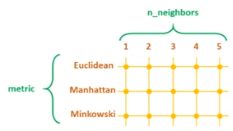

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'n_neighbors':np.arange(1,20),
    'metric':['euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Comment avoir le meilleur score

In [17]:
grid.best_score_

0.9666666666666668

In [18]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 12}

In [19]:
model = grid.best_estimator_
model.score(X_test,y_test)

1.0

Maintenant comment savoir si notre modèle pourra mieux apprendre en lui fournissant les données..

## Learning curve 

La machine a des limites quant il s'agit de l'apprentissage
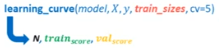

In [20]:
from sklearn.model_selection import learning_curve

[19 22 25 28 32 35 38 41 44 48 51 54 57 60 64 67 70 73 76 80 83 86 89 92
 96]


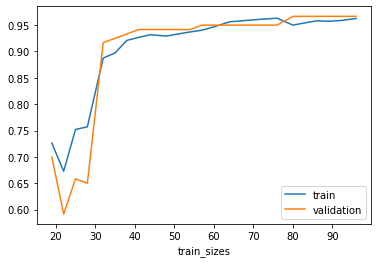

In [21]:
N,train_score,val_score= learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.2,1.0,25),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.xlabel('train_sizes')
plt.legend()

Avec cette méthode, il est inutile d'acheter d'autres données pour ce modèle.

## Exercice:
Faire un exercice pratique avec une base de données réelle